# Predicting the Season Outcome for a Team

Before I start with the analysis, I want to show you, the reader, how I came up with the idea to build the model. When we use a Kaggle or any other generated data set, we have a clear vision of what we want to do with the data. Still, when we gather the data ourselves, we might start with an idea, but this idea gets refined, changed, shattered etc. I want to illustrate how I developed the features and vision to create this model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_html('https://fbref.com/de/wettbewerbe/20/2022-2023/Statistiken-Bundesliga-2022-2023')[0]
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,Pkte./GS,xG,xGA,xGD,xGD/90,Zuschauerzahl,Torschützenkönig des Vereins,Torwart,Hinweise
0,1,Bayern Munich,34,21,8,5,92,38,54,71,209,75.0,37.1,37.8,111,75.000,Serge Gnabry - 14,Yann Sommer,→ Champions League per Ligaplatzierung
1,2,Dortmund,34,22,5,7,83,44,39,71,209,71.1,43.2,27.9,82,81.228,"Julian Brandt, Donyell Malen... - 9",Gregor Kobel,→ Champions League per Ligaplatzierung
2,3,RB Leipzig,34,20,6,8,64,41,23,66,194,62.7,37.2,25.4,75,45.961,Christopher Nkunku - 16,Janis Blaswich,→ Champions League per Ligaplatzierung
3,4,Union Berlin,34,18,8,8,51,38,13,62,182,37.9,42.6,-4.7,-14,21.822,Sheraldo Becker - 11,Frederik Rønnow,→ Champions League per Ligaplatzierung
4,5,Freiburg,34,17,8,9,51,44,7,59,174,48.0,48.8,-0.8,-2,34.112,Vincenzo Grifo - 15,Mark Flekken,→ Europa League per Ligaplatzierung


In [ ]:
print(df.columns.to_list())

['Rg', 'Verein', 'GS', 'S', 'U', 'N', 'Tf', 'Tk', 'TD', 'Pkt', 'Pkte./GS', 'xG', 'xGA', 'xGD', 'xGD/90', 'Zuschauerzahl', 'Torschützenkönig des Vereins', 'Torwart', 'Hinweise']


In [ ]:
df=df[['Rg', 'Verein', 'GS', 'S', 'U', 'N', 'Tf', 'Tk', 'TD', 'Pkt']]
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt
0,1,Bayern Munich,34,21,8,5,92,38,54,71
1,2,Dortmund,34,22,5,7,83,44,39,71
2,3,RB Leipzig,34,20,6,8,64,41,23,66
3,4,Union Berlin,34,18,8,8,51,38,13,62
4,5,Freiburg,34,17,8,9,51,44,7,59


In [ ]:
df_wdl=pd.read_html('https://fbref.com/de/wettbewerbe/20/2022-2023/Statistiken-Bundesliga-2022-2023')[4]
print(df_wdl.columns.to_list)

<bound method IndexOpsMixin.tolist of MultiIndex([('Unnamed: 0_level_0',   'Verein'),
            ('Unnamed: 1_level_0',     '# Sp'),
            (         'Spielzeit',       'GS'),
            (         'Spielzeit', 'Startelf'),
            (         'Spielzeit',     'Min.'),
            (         'Spielzeit',       '90'),
            (          'Leistung',       'Tk'),
            (          'Leistung',     'Tk90'),
            (          'Leistung',     'SaTk'),
            (          'Leistung',  'Paraden'),
            (          'Leistung',    'Fangq'),
            (          'Leistung',        'S'),
            (          'Leistung',        'U'),
            (          'Leistung',        'N'),
            (          'Leistung',       'OG'),
            (          'Leistung',      'OGQ'),
            (      'Strafschüsse',    'VeElf'),
            (      'Strafschüsse',      'ESs'),
            (      'Strafschüsse',     'AgSs'),
            (      'Strafschüsse',      'VSs'),
  

In [ ]:
df_wdl=df_wdl.droplevel(0, axis=1)
df_wdl.head()

,Verein,# Sp,GS,Startelf,Min.,90,Tk,Tk90,SaTk,Paraden,...,S,U,N,OG,OGQ,VeElf,ESs,AgSs,VSs,Fangq
0,Augsburg,2,34,34,3.06,34.0,63,185,201,138,...,9,7,18,6,176,4,1,2,1,667
1,Bayern Munich,3,34,34,3.06,34.0,38,112,107,68,...,21,8,5,11,324,10,9,1,0,100
2,Bochum,1,34,34,3.06,34.0,72,212,200,128,...,10,5,19,5,147,14,8,3,3,273
3,Dortmund,2,34,34,3.06,34.0,44,129,151,108,...,22,5,7,12,353,1,1,0,0,0
4,Eint Frankfurt,2,34,34,3.06,34.0,52,153,135,84,...,13,11,10,6,176,2,2,0,0,0


In [ ]:
df_wdl=df_wdl[['Verein', 'S', 'U', 'N']]
df_wdl.head()

,Verein,S,U,N
0,Augsburg,9,7,18
1,Bayern Munich,21,8,5
2,Bochum,10,5,19
3,Dortmund,22,5,7
4,Eint Frankfurt,13,11,10


Don't know why I did that, next time check the first dataframe genius!

Let's go back to the df dataframe

In [ ]:
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt
0,1,Bayern Munich,34,21,8,5,92,38,54,71
1,2,Dortmund,34,22,5,7,83,44,39,71
2,3,RB Leipzig,34,20,6,8,64,41,23,66
3,4,Union Berlin,34,18,8,8,51,38,13,62
4,5,Freiburg,34,17,8,9,51,44,7,59


In [ ]:
df['win_pct']=round((df['S']/df['GS'])*100,2)
df['draw_pct']=round((df['U']/df['GS'])*100,2)
df['lose_pct']=round((df['N']/df['GS'])*100,2)
df['pyth']=df['Tf']**2/(df['Tf']**2 + df['Tk']**2)
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,win_pct,draw_pct,lose_pct,pyth
0,1,Bayern Munich,34,21,8,5,92,38,54,71,61.76,23.53,14.71,0.854259
1,2,Dortmund,34,22,5,7,83,44,39,71,64.71,14.71,20.59,0.780623
2,3,RB Leipzig,34,20,6,8,64,41,23,66,58.82,17.65,23.53,0.709019
3,4,Union Berlin,34,18,8,8,51,38,13,62,52.94,23.53,23.53,0.643016
4,5,Freiburg,34,17,8,9,51,44,7,59,50.00,23.53,26.47,0.573286


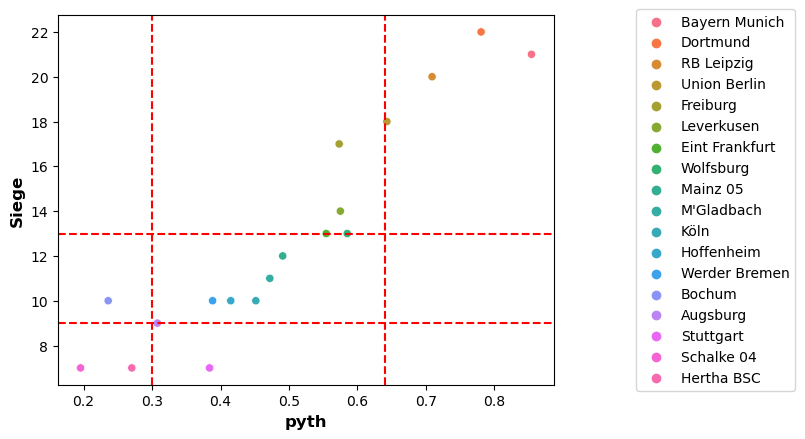

In [ ]:
plt.figure()
sns.scatterplot(x='pyth', y='S', hue='Verein', data=df)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Siege', size=12, fontweight='bold')
plt.axhline(y=13, linestyle='--', color='red')
plt.axvline(0.64, linestyle='--', color='red')
plt.axhline(9, linestyle='--', color='red')
plt.axvline(0.3, linestyle='--', color='red')

<Axes: xlabel='pyth', ylabel='S'>

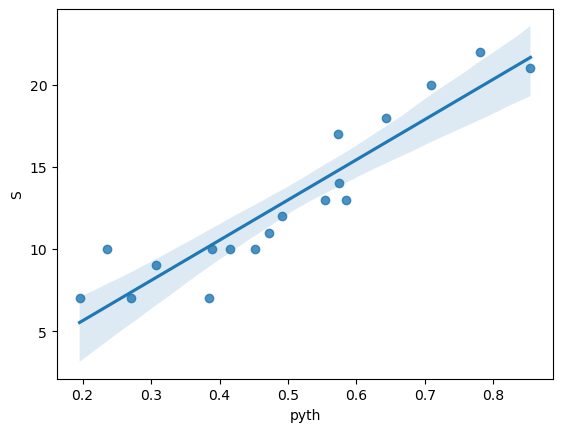

In [ ]:
sns.regplot(x='pyth', y='S', data=df)

Text(0.5, 1.0, 'Champion League Qualification')

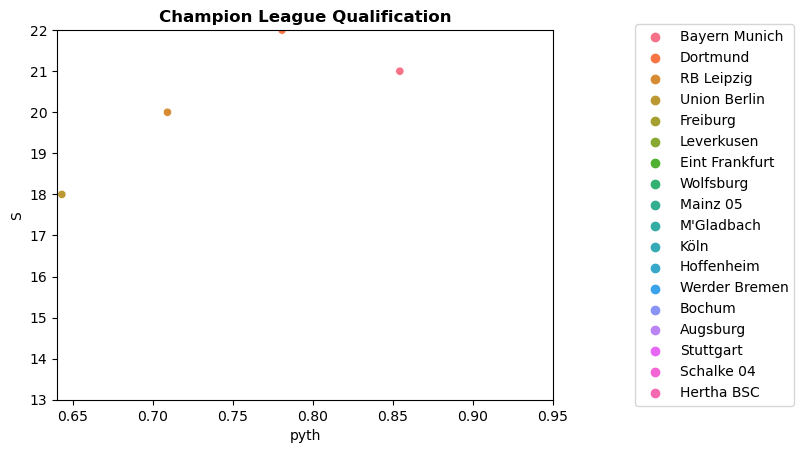

In [ ]:
plt.figure()
sns.scatterplot(x='pyth', y='S', hue='Verein', data=df)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlim(0.64,0.95)
plt.ylim(13,22)
plt.title('Champion League Qualification', size=12, fontweight='bold')

Text(0.5, 1.0, 'EuroLeague Qualification')

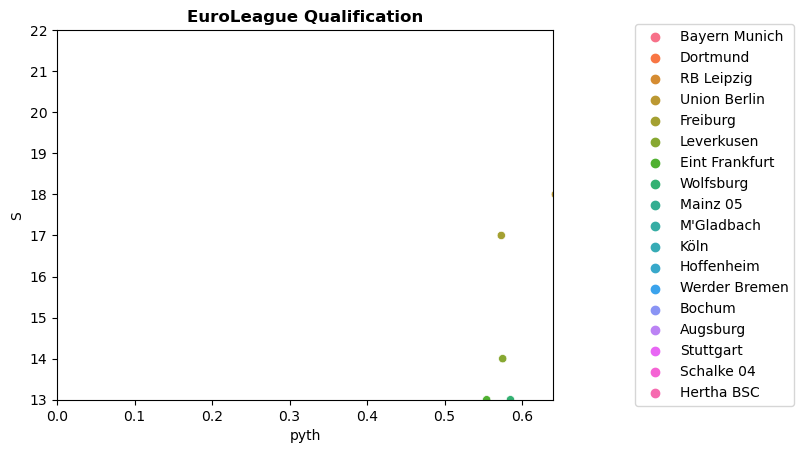

In [ ]:
plt.figure()
sns.scatterplot(x='pyth', y='S', hue='Verein', data=df)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlim(0,0.64)
plt.ylim(13,22)
plt.title('EuroLeague Qualification', size=12, fontweight='bold')

Text(0.5, 1.0, 'Abstiegskandidaten')

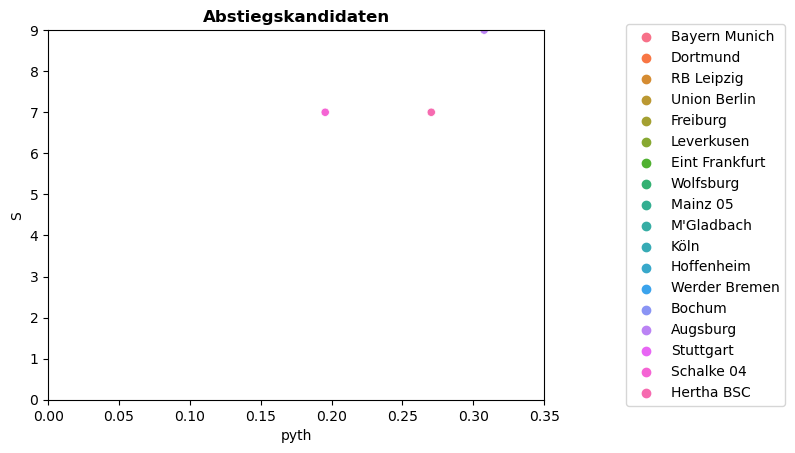

In [ ]:
plt.figure()
sns.scatterplot(x='pyth', y='S', hue='Verein', data=df)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlim(0,0.35)
plt.ylim(0,9)
plt.title('Abstiegskandidaten', size=12, fontweight='bold')

Here we can see that setting the boundaries for the different performance groups is straightforward, but we must wait for the season to complete. In this project, I want to create a classification model to predict whether a team will be demoted, finish in the midfield, qualify for the EuroLeague, or qualify for the Champions League, Euro League or Conference League (international).

In [ ]:
df_ha=pd.read_html('https://fbref.com/de/wettbewerbe/20/2022-2023/Statistiken-Bundesliga-2022-2023')[1]
df_ha.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Heim                            ...  \
                  Rg             Verein   GS   S  U  N  Tf  Tk  TD Pkt  ...   
0                  1      Bayern Munich   17  11  5  1  53  17  36  38  ...   
1                  2           Dortmund   17  14  2  1  55  17  38  44  ...   
2                  3         RB Leipzig   17  13  2  2  38  18  20  41  ...   
3                  4       Union Berlin   17  11  6  0  30  11  19  39  ...   
4                  5           Freiburg   17  10  4  3  28  13  15  34  ...   

  Auswärts                                                    
         N  Tf  Tk  TD Pkt Pkte./GS    xG   xGA   xGD xGD/90  
0        4  39  21  18  33      194  30.3  20.6   9.8     57  
1        6  28  27   1  27      159  31.2  24.8   6.4     38  
2        6  26  23   3  25      147  29.9  18.9  10.9     64  
3        8  21  27  -6  23      135  17.7  23.8  -6.0    -35  
4        6  23  31  -8  25      147  20.4  26.5  -6.2    -36  

[5 rows x 28 columns]

In [ ]:
df_ha=df_ha.droplevel(0, axis=1)
df_ha.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,...,N,Tf,Tk,TD,Pkt,Pkte./GS,xG,xGA,xGD,xGD/90
0,1,Bayern Munich,17,11,5,1,53,17,36,38,...,4,39,21,18,33,194,30.3,20.6,9.8,57
1,2,Dortmund,17,14,2,1,55,17,38,44,...,6,28,27,1,27,159,31.2,24.8,6.4,38
2,3,RB Leipzig,17,13,2,2,38,18,20,41,...,6,26,23,3,25,147,29.9,18.9,10.9,64
3,4,Union Berlin,17,11,6,0,30,11,19,39,...,8,21,27,-6,23,135,17.7,23.8,-6.0,-35
4,5,Freiburg,17,10,4,3,28,13,15,34,...,6,23,31,-8,25,147,20.4,26.5,-6.2,-36


In [ ]:
print(df_ha.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['Rg', 'Verein', 'GS', 'S', 'U', 'N', 'Tf', 'Tk', 'TD', 'Pkt',
       'Pkte./GS', 'xG', 'xGA', 'xGD', 'xGD/90', 'GS', 'S', 'U', 'N', 'Tf',
       'Tk', 'TD', 'Pkt', 'Pkte./GS', 'xG', 'xGA', 'xGD', 'xGD/90'],
      dtype='object')>


In [ ]:
df_home=df_ha.iloc[:,[1,2,3,4,5,6,7,8,9]]
df_home=df_home.rename(columns={'GS':'home_game', 'S':'home_vic', 'U':'home_draw', 'N':'home_lose',
                                'Tf':'home_goal', 'Tk':'home_goal_agianst', 'TD':'home_goal_diff',
                                'Pkt':'home_points'})
df_home['home_win_pct']=round((df_home['home_vic']/df_home['home_game'])*100,2)
df_home['home_draw_pct']=round((df_home['home_draw']/df_home['home_game'])*100,2)
df_home['home_lose_pct']=round((df_home['home_lose']/df_home['home_game'])*100,2)
df_home['home_pyth']=df_home['home_goal']**2/(df_home['home_goal']**2 + df_home['home_goal_agianst']**2)
df_home.head()

,Verein,home_game,home_vic,home_draw,home_lose,home_goal,home_goal_agianst,home_goal_diff,home_points,home_win_pct,home_draw_pct,home_lose_pct,home_pyth
0,Bayern Munich,17,11,5,1,53,17,36,38,64.71,29.41,5.88,0.906714
1,Dortmund,17,14,2,1,55,17,38,44,82.35,11.76,5.88,0.912794
2,RB Leipzig,17,13,2,2,38,18,20,41,76.47,11.76,11.76,0.816742
3,Union Berlin,17,11,6,0,30,11,19,39,64.71,35.29,0.00,0.881489
4,Freiburg,17,10,4,3,28,13,15,34,58.82,23.53,17.65,0.822665


In [ ]:
df_away=df_ha.iloc[:,[1,15,16,17,18,19,20,21,22]]
df_away=df_away.rename(columns={'GS':'away_game', 'S':'away_vic', 'U':'away_draw', 'N':'away_lose',
                                'Tf':'away_goal', 'Tk':'away_goal_agianst', 'TD':'away_goal_diff',
                                'Pkt':'away_points'})
df_away['away_win_pct']=round((df_away['away_vic']/df_away['away_game'])*100,2)
df_away['away_draw_pct']=round((df_away['away_draw']/df_away['away_game'])*100,2)
df_away['away_lose_pct']=round((df_away['away_lose']/df_away['away_game'])*100,2)
df_away['away_pyth']=df_away['away_goal']**2/(df_away['away_goal']**2 + df_away['away_goal_agianst']**2)
df_away.head()

,Verein,away_game,away_vic,away_draw,away_lose,away_goal,away_goal_agianst,away_goal_diff,away_points,away_win_pct,away_draw_pct,away_lose_pct,away_pyth
0,Bayern Munich,17,10,3,4,39,21,18,33,58.82,17.65,23.53,0.775229
1,Dortmund,17,8,3,6,28,27,1,27,47.06,17.65,35.29,0.518176
2,RB Leipzig,17,7,4,6,26,23,3,25,41.18,23.53,35.29,0.560996
3,Union Berlin,17,7,2,8,21,27,-6,23,41.18,11.76,47.06,0.376923
4,Freiburg,17,7,4,6,23,31,-8,25,41.18,23.53,35.29,0.355034


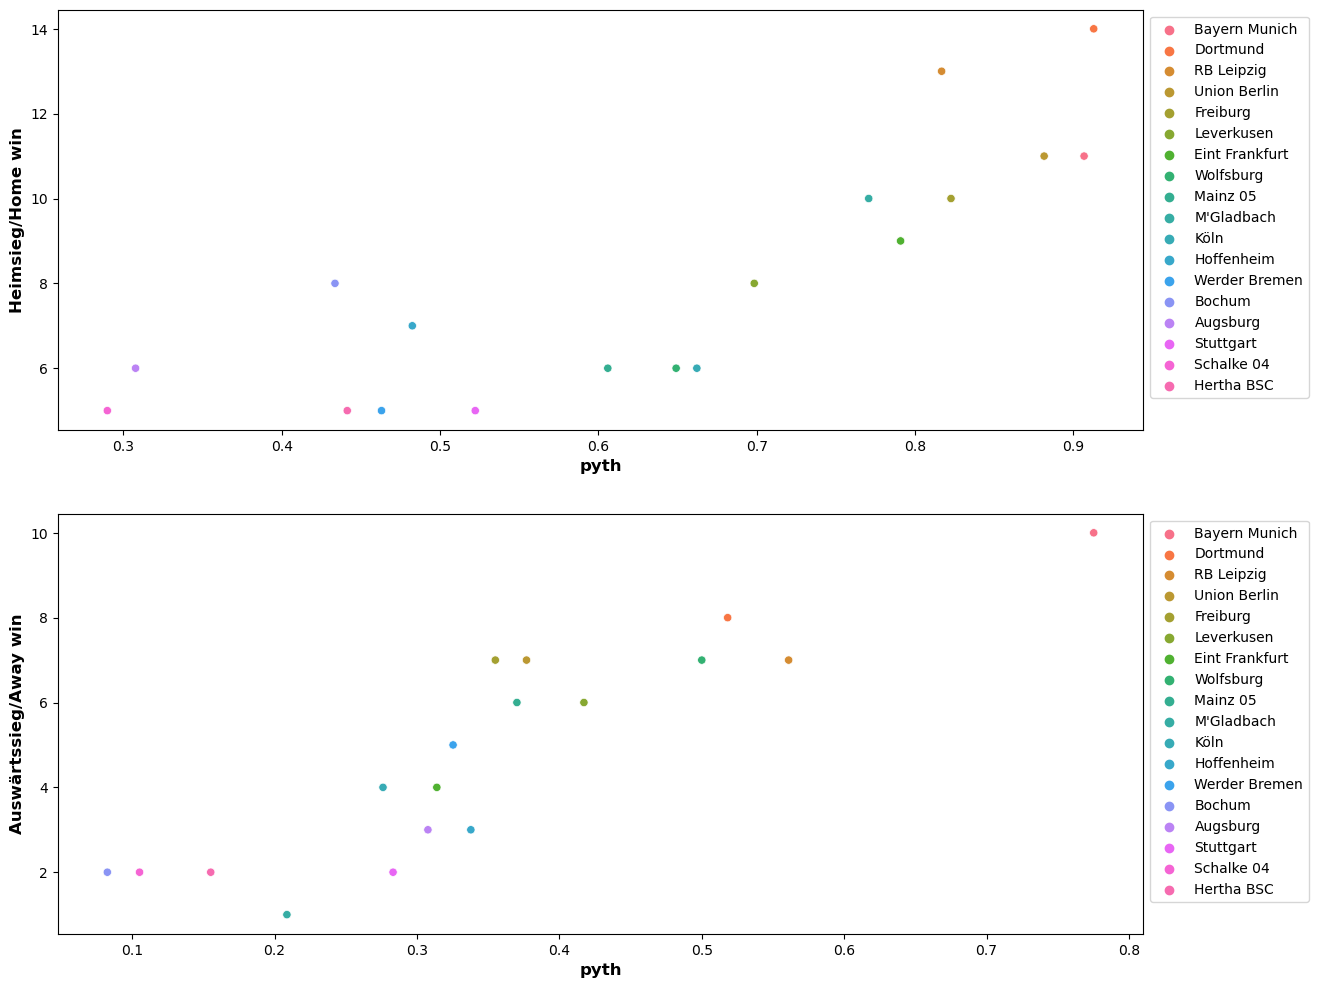

In [ ]:
plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
sns.scatterplot(x='home_pyth', y='home_vic', hue='Verein', data=df_home)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Heimsieg/Home win', size=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1,1))
#plt.axhline(y=13, linestyle='--', color='red')
#plt.axvline(0.64, linestyle='--', color='red')

plt.subplot(2,1,2)
sns.scatterplot(x='away_pyth', y='away_vic', hue='Verein', data=df_away)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Auswärtssieg/Away win', size=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1,1))
#plt.axhline(y=13, linestyle='--', color='red')
#plt.axvline(0.64, linestyle='--', color='red')

### Everything above outlines what we will do in this project

1. we get data from the Bundesliga of the last 13 years

2. data cleaning and formatting

3. we do some explanotory analysis

4. We build a ML Model

    4.1 Classification Model

In [ ]:
# here we get the data for the model
df23=pd.read_html('https://fbref.com/de/wettbewerbe/20/2022-2023/Statistiken-Bundesliga-2022-2023')[0]
df23['season']=2023
df22=pd.read_html('https://fbref.com/de/wettbewerbe/20/2021-2022/Statistiken-Bundesliga-2021-2022')[0]
df22['season']=2022
df21=pd.read_html('https://fbref.com/de/wettbewerbe/20/2020-2021/Statistiken-Bundesliga-2020-2021')[0]
df21['season']=2021
df20=pd.read_html('https://fbref.com/de/wettbewerbe/20/2019-2020/Statistiken-Bundesliga-2019-2020')[0]
df20['season']=2020
df19=pd.read_html('https://fbref.com/de/wettbewerbe/20/2018-2019/Statistiken-Bundesliga-2018-2019')[0]
df19['season']=2019
df18=pd.read_html('https://fbref.com/de/wettbewerbe/20/2017-2018/Statistiken-Bundesliga-2017-2018')[0]
df18['season']=2018
df17=pd.read_html('https://fbref.com/de/wettbewerbe/20/2016-2017/Statistiken-Bundesliga-2016-2017')[0]
df17['season']=2017
df16=pd.read_html('https://fbref.com/de/wettbewerbe/20/2015-2016/Statistiken-Bundesliga-2015-2016')[0]
df16['season']=2016
df15=pd.read_html('https://fbref.com/de/wettbewerbe/20/2014-2015/Statistiken-Bundesliga-2014-2015')[0]
df15['season']=2015
df14=pd.read_html('https://fbref.com/de/wettbewerbe/20/2013-2014/Statistiken-Bundesliga-2013-2014')[0]
df14['season']=2014
df13=pd.read_html('https://fbref.com/de/wettbewerbe/20/2012-2013/Statistiken-Bundesliga-2012-2013')[0]
df13['season']=2013
df12=pd.read_html('https://fbref.com/de/wettbewerbe/20/2011-2012/Statistiken-Bundesliga-2011-2012')[0]
df12['season']=2012
df11=pd.read_html('https://fbref.com/de/wettbewerbe/20/2010-2011/Statistiken-Bundesliga-2010-2011')[0]
df11['season']=2011

In [ ]:
df14.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,Pkte./GS,Zuschauerzahl,Torschützenkönig des Vereins,Torwart,Hinweise,season
0,1,Bayern Munich,34,29,3,2,94,23,71,90,265,71.000,Mario Mandžukić - 18,Manuel Neuer,→ Champions League per Ligaplatzierung,2014
1,2,Dortmund,34,22,5,7,80,38,42,71,209,80.297,Robert Lewandowski - 20,Roman Weidenfeller,→ Champions League per Ligaplatzierung,2014
2,3,Schalke 04,34,19,7,8,63,43,20,64,188,61.569,Klaas-Jan Huntelaar - 12,Ralf Fährmann,→ Champions League per Ligaplatzierung,2014
3,4,Leverkusen,34,19,4,11,60,41,19,61,179,28.452,Stefan Kießling - 15,Bernd Leno,→ Champions League per Ligaplatzierung,2014
4,5,Wolfsburg,34,18,6,10,63,50,13,60,176,50.498,Ivica Olić - 14,Diego Benaglio,→ Europa League per Ligaplatzierung 1,2014


In [ ]:
df14.shape

(18, 16)

In [ ]:
df_bl=pd.concat([df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11])
df_bl.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,Pkte./GS,xG,xGA,xGD,xGD/90,Zuschauerzahl,Torschützenkönig des Vereins,Torwart,Hinweise,season
0,1,Bayern Munich,34,21,8,5,92,38,54,71,209,75.0,37.1,37.8,111.0,75.000,Serge Gnabry - 14,Yann Sommer,→ Champions League per Ligaplatzierung,2023
1,2,Dortmund,34,22,5,7,83,44,39,71,209,71.1,43.2,27.9,82.0,81.228,"Julian Brandt, Donyell Malen... - 9",Gregor Kobel,→ Champions League per Ligaplatzierung,2023
2,3,RB Leipzig,34,20,6,8,64,41,23,66,194,62.7,37.2,25.4,75.0,45.961,Christopher Nkunku - 16,Janis Blaswich,→ Champions League per Ligaplatzierung,2023
3,4,Union Berlin,34,18,8,8,51,38,13,62,182,37.9,42.6,-4.7,-14.0,21.822,Sheraldo Becker - 11,Frederik Rønnow,→ Champions League per Ligaplatzierung,2023
4,5,Freiburg,34,17,8,9,51,44,7,59,174,48.0,48.8,-0.8,-2.0,34.112,Vincenzo Grifo - 15,Mark Flekken,→ Europa League per Ligaplatzierung,2023


In [ ]:
# getting the topscorer of each club for each season
df_bl['Torschützenkönig des Vereins'].apply(lambda x: x.split('-')[0])

0                        Serge Gnabry 
1     Julian Brandt, Donyell Malen... 
2                  Christopher Nkunku 
3                     Sheraldo Becker 
4                      Vincenzo Grifo 
                    ...               
13                               Raúl 
14                         Edin Džeko 
15                         Marco Reus 
16                    Theofanis Gekas 
17                     Gerald Asamoah 
Name: Torschützenkönig des Vereins, Length: 234, dtype: object

In [ ]:
# here we clean the data and create features for the analysis
df_bl=pd.concat([df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11])
df_bl['top_scorer(s)']=df_bl['Torschützenkönig des Vereins'].apply(lambda x: x.split('-')[0])
df_bl['top_scorer_goals']=df_bl['Torschützenkönig des Vereins'].apply(lambda x: x.split('-')[-1])
df_bl['points/games_played']=df_bl['Pkte./GS']/100
df_bl['win_pct']=round((df_bl['S']/df_bl['GS'])*100,2)
df_bl['draw_pct']=round((df_bl['U']/df_bl['GS'])*100,2)
df_bl['lose_pct']=round((df_bl['N']/df_bl['GS'])*100,2)
df_bl['pyth']=df_bl['Tf']**2/(df_bl['Tf']**2 + df_bl['Tk']**2)
df_bl=df_bl.drop(['Torschützenkönig des Vereins', 'Torwart', 'Pkte./GS', 'Zuschauerzahl'], axis=1)
df_bl=df_bl.rename(columns={'Hinweise':'outcome'})
df_bl.head(18)

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,...,xGD/90,outcome,season,top_scorer(s),top_scorer_goals,points/games_played,win_pct,draw_pct,lose_pct,pyth
0,1,Bayern Munich,34,21,8,5,92,38,54,71,...,111.0,→ Champions League per Ligaplatzierung,2023,Serge Gnabry,14,2.09,61.76,23.53,14.71,0.854259
1,2,Dortmund,34,22,5,7,83,44,39,71,...,82.0,→ Champions League per Ligaplatzierung,2023,"Julian Brandt, Donyell Malen...",9,2.09,64.71,14.71,20.59,0.780623
2,3,RB Leipzig,34,20,6,8,64,41,23,66,...,75.0,→ Champions League per Ligaplatzierung,2023,Christopher Nkunku,16,1.94,58.82,17.65,23.53,0.709019
3,4,Union Berlin,34,18,8,8,51,38,13,62,...,-14.0,→ Champions League per Ligaplatzierung,2023,Sheraldo Becker,11,1.82,52.94,23.53,23.53,0.643016
4,5,Freiburg,34,17,8,9,51,44,7,59,...,-2.0,→ Europa League per Ligaplatzierung,2023,Vincenzo Grifo,15,1.74,50.00,23.53,26.47,0.573286
5,6,Leverkusen,34,14,8,12,57,49,8,50,...,25.0,→ Europa League per Ligaplatzierung,2023,Moussa Diaby,9,1.47,41.18,23.53,35.29,0.575044
6,7,Eint Frankfurt,34,13,11,10,58,52,6,50,...,25.0,→ Europa Conference League per Ligaplatzierung,2023,Randal Kolo Muani,15,1.47,38.24,32.35,29.41,0.554384
7,8,Wolfsburg,34,13,10,11,57,48,9,49,...,0.0,NaN,2023,"Yannick Gerhardt, Jonas Wind",6,1.44,38.24,29.41,32.35,0.585089
8,9,Mainz 05,34,12,10,12,54,55,-1,46,...,-19.0,NaN,2023,"Marcus Ingvartsen, Karim Onisiwo",10,1.35,35.29,29.41,35.29,0.490826
9,10,M'Gladbach,34,11,10,13,52,55,-3,43,...,-4.0,NaN,2023,Marcus Thuram,13,1.26,32.35,29.41,38.24,0.471985


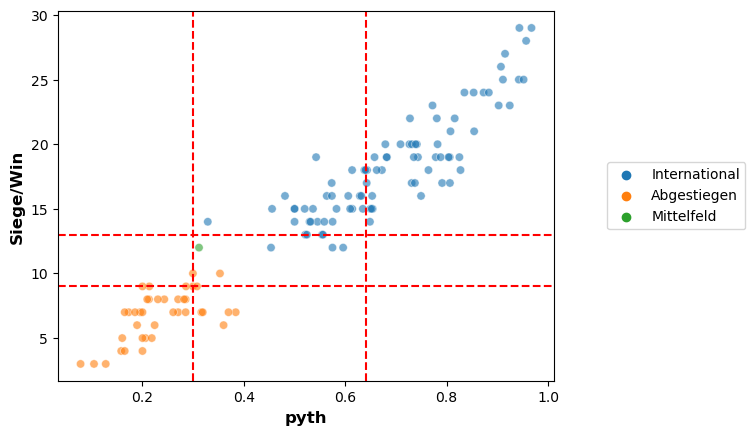

In [ ]:
df_bl['outcome']=df_bl['outcome'].replace({'→ Champions League per Sieg in Champions League':'International',
                          '→ Europa League per Ligaplatzierung':'International', '→ Europa Conference League per Ligaplatzierung':'International',
                          '→ German 1/2 Relegation/Promotion Play-offs':'Abgestiegen', '→ Europa League per Ligaplatzierung 1':'International',
                          '→ Europa League per Pokalniederlage 2':'Mittelfeld', '→ Champions League per Ligaplatzierung':'International',
                          '→ German 1/2 Relegation/Promotion Playoffs':'Abgestiegen'})
plt.figure()
sns.scatterplot(x='pyth', y='S', alpha=0.6, hue='outcome', data=df_bl)
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Siege/Win', size=12, fontweight='bold')
plt.axhline(y=13, linestyle='--', color='red')
plt.axvline(0.64, linestyle='--', color='red')
plt.axhline(9, linestyle='--', color='red')
plt.axvline(0.3, linestyle='--', color='red')

The visualization above shows that it is relatively easy to determine if a team will qualify for an international place or will be demoted based on its win - Pythagorean theorem relationship*. But when we use this particular relationship, we can see that the group midfielder are underrepresented. Using this approach would ignore the midfielders.

*Pythagorean Winning Percentage=> a method that gives an expected winning percentage using the ratio of a team's wins and losses are related to the number of points scored and allowed

But "Mittelfeld" seems to be underrepresented, let's check real quick.

In [ ]:
# as we can see all the middfielder outcomes are missing let's replace that
df_bl[df_bl['outcome'].isnull()].groupby(['Rg'])['Verein'].count()

Rg
6      1
7      3
8     13
9     13
10    13
11    13
12    12
13    13
14    13
15    13
Name: Verein, dtype: int64

In [ ]:
df_bl['outcome']=df_bl['outcome'].fillna('Mittelfeld')
df_bl

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,...,xGD/90,outcome,season,top_scorer(s),top_scorer_goals,points/games_played,win_pct,draw_pct,lose_pct,pyth
0,1,Bayern Munich,34,21,8,5,92,38,54,71,...,111.0,International,2023,Serge Gnabry,14,2.09,61.76,23.53,14.71,0.854259
1,2,Dortmund,34,22,5,7,83,44,39,71,...,82.0,International,2023,"Julian Brandt, Donyell Malen...",9,2.09,64.71,14.71,20.59,0.780623
2,3,RB Leipzig,34,20,6,8,64,41,23,66,...,75.0,International,2023,Christopher Nkunku,16,1.94,58.82,17.65,23.53,0.709019
3,4,Union Berlin,34,18,8,8,51,38,13,62,...,-14.0,International,2023,Sheraldo Becker,11,1.82,52.94,23.53,23.53,0.643016
4,5,Freiburg,34,17,8,9,51,44,7,59,...,-2.0,International,2023,Vincenzo Grifo,15,1.74,50.00,23.53,26.47,0.573286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,14,Schalke 04,34,11,7,16,38,44,-6,40,...,NaN,Mittelfeld,2011,Raúl,13,1.18,32.35,20.59,47.06,0.427219
14,15,Wolfsburg,34,9,11,14,43,48,-5,38,...,NaN,Mittelfeld,2011,Edin Džeko,10,1.12,26.47,32.35,41.18,0.445220
15,16,M'Gladbach,34,10,6,18,48,65,-17,36,...,NaN,Abgestiegen,2011,Marco Reus,10,1.06,29.41,17.65,52.94,0.352887
16,17,Eint Frankfurt,34,9,7,18,31,49,-18,34,...,NaN,Abgestiegen,2011,Theofanis Gekas,16,1.00,26.47,20.59,52.94,0.285842


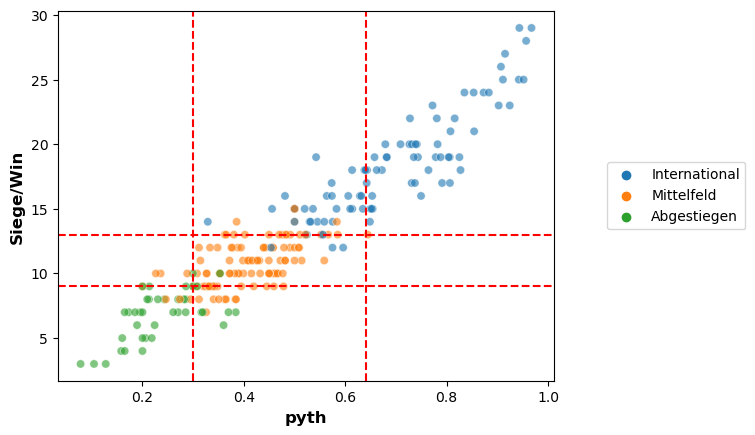

In [ ]:
# as we can see we have a much better represenation of our data
plt.figure()
sns.scatterplot(x='pyth', y='S', alpha=0.6, hue='outcome', data=df_bl)
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Siege/Win', size=12, fontweight='bold')
plt.axhline(y=13, linestyle='--', color='red')
plt.axvline(0.64, linestyle='--', color='red')
plt.axhline(9, linestyle='--', color='red')
plt.axvline(0.3, linestyle='--', color='red')

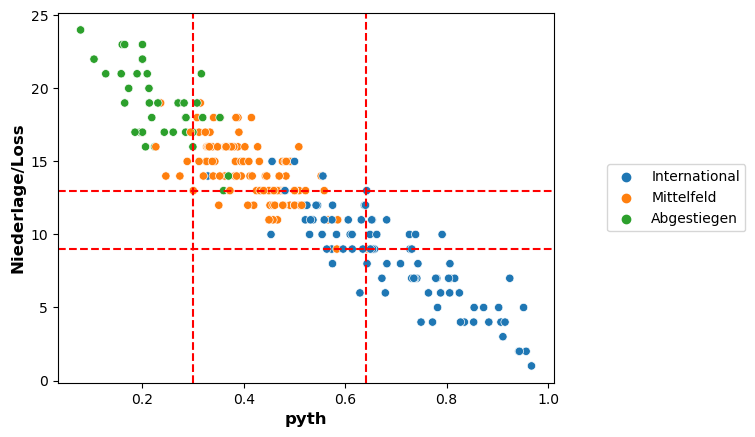

In [ ]:
plt.figure()
sns.scatterplot(x='pyth', y='N', hue='outcome', data=df_bl)
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel('pyth', size=12, fontweight='bold')
plt.ylabel('Niederlage/Loss', size=12, fontweight='bold')
plt.axhline(y=13, linestyle='--', color='red')
plt.axvline(0.64, linestyle='--', color='red')
plt.axhline(9, linestyle='--', color='red')
plt.axvline(0.3, linestyle='--', color='red')

As we can see, the Pythagorean term combined with Loss allows us to observe a familiar picture of the different groups.

A team with a higher Pythagorean term tends to have fewer losses, but the lines get blurry, and we see some "misclassifications".

We can also use a more descriptive approach, using the mean of each continuous feature.

In [ ]:
print('avg points of a demoted Team: ', int(df_bl[df_bl['outcome']=='Abgestiegen']['Pkt'].mean()))
print('avg number of victories of a demoted Team: ', int(df_bl[df_bl['outcome']=='Abgestiegen']['S'].mean()))
print('avg number of draws of a demoted Team: ', int(df_bl[df_bl['outcome']=='Abgestiegen']['U'].mean()))
print('avg number of losses of a demoted Team: ', int(df_bl[df_bl['outcome']=='Abgestiegen']['N'].mean()))
print('avg win_pct of a demoted Team: ', round(df_bl[df_bl['outcome']=='Abgestiegen']['win_pct'].mean(),2))
print('avg draw_pct of a demoted Team: ', round(df_bl[df_bl['outcome']=='Abgestiegen']['draw_pct'].mean(),2))
print('avg lose_pct of a demoted Team: ', round(df_bl[df_bl['outcome']=='Abgestiegen']['lose_pct'].mean(),2))
print('avg pyth of a demoted Team: ', round(df_bl[df_bl['outcome']=='Abgestiegen']['pyth'].mean(),2))

avg points of a demoted Team:  28
avg number of victories of a demoted Team:  6
avg number of draws of a demoted Team:  8
avg number of losses of a demoted Team:  18
avg win_pct of a demoted Team:  19.91
avg draw_pct of a demoted Team:  24.59
avg lose_pct of a demoted Team:  55.5
avg pyth of a demoted Team:  0.24


Again, this might be considered more as a random approach. We look for a more sophisticated approach. Therefore we will create a classification model which allows for predicting the right outcome of a team in the Bundesliga.

In [ ]:
df_bl.to_csv('bundesliga.csv')

# Start of the Classification Project

In [ ]:
df=pd.read_csv('/content/bundesliga.csv')
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,...,xGD/90,outcome,season,top_scorer(s),top_scorer_goals,points/games_played,win_pct,draw_pct,lose_pct,pyth
0,1,Bayern Munich,34,21,8,5,92,38,54,71,...,111.0,International,2023,Serge Gnabry,14,2.09,61.76,23.53,14.71,0.854259
1,2,Dortmund,34,22,5,7,83,44,39,71,...,82.0,International,2023,"Julian Brandt, Donyell Malen...",9,2.09,64.71,14.71,20.59,0.780623
2,3,RB Leipzig,34,20,6,8,64,41,23,66,...,75.0,International,2023,Christopher Nkunku,16,1.94,58.82,17.65,23.53,0.709019
3,4,Union Berlin,34,18,8,8,51,38,13,62,...,-14.0,International,2023,Sheraldo Becker,11,1.82,52.94,23.53,23.53,0.643016
4,5,Freiburg,34,17,8,9,51,44,7,59,...,-2.0,International,2023,Vincenzo Grifo,15,1.74,50.00,23.53,26.47,0.573286


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rg                   234 non-null    int64  
 1   Verein               234 non-null    object 
 2   GS                   234 non-null    int64  
 3   S                    234 non-null    int64  
 4   U                    234 non-null    int64  
 5   N                    234 non-null    int64  
 6   Tf                   234 non-null    int64  
 7   Tk                   234 non-null    int64  
 8   TD                   234 non-null    int64  
 9   Pkt                  234 non-null    int64  
 10  xG                   108 non-null    float64
 11  xGA                  108 non-null    float64
 12  xGD                  108 non-null    float64
 13  xGD/90               108 non-null    float64
 14  outcome              234 non-null    object 
 15  season               234 non-null    int

In [ ]:
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                     53.846154
xGA                    53.846154
xGD                    53.846154
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

We have four columns, which contain missing data. These columns represent expected variables, like expected goals, goals against etc.

We will tackle this problem in two phases.
In the first phase, we will take the average of each club's expected columns and fill them in.

The second phase is for the clubs which only had one season in the Bundesliga, they do not have any value, and we cannot place an average. To fix that problem, we will identify the average according to their group (International, Mittelfeld/Midfield, Abgestiegen/Demotion).

## xG

In [ ]:
df['xG']=df['xG'].fillna(df.groupby('Verein')['xG'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      3.418803
xGA                    53.846154
xGD                    53.846154
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

We need the second phase to fix the remaining missing values.

In [ ]:
df['xG']=df['xG'].fillna(df.groupby('outcome')['xG'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      0.000000
xGA                    53.846154
xGD                    53.846154
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

## xGA

In [ ]:
df['xGA']=df['xGA'].fillna(df.groupby('Verein')['xGA'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      0.000000
xGA                     3.418803
xGD                    53.846154
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

In [ ]:
df['xGA']=df['xGA'].fillna(df.groupby('outcome')['xGA'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      0.000000
xGA                     0.000000
xGD                    53.846154
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

## xGD

In [ ]:
df['xGD']=df['xGD'].fillna(df.groupby('Verein')['xGD'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      0.000000
xGA                     0.000000
xGD                     3.418803
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

In [ ]:
df['xGD']=df['xGD'].fillna(df.groupby('outcome')['xGD'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                      0.000000
Verein                  0.000000
GS                      0.000000
S                       0.000000
U                       0.000000
N                       0.000000
Tf                      0.000000
Tk                      0.000000
TD                      0.000000
Pkt                     0.000000
xG                      0.000000
xGA                     0.000000
xGD                     0.000000
xGD/90                 53.846154
outcome                 0.000000
season                  0.000000
top_scorer(s)           0.000000
top_scorer_goals        0.000000
points/games_played     0.000000
win_pct                 0.000000
draw_pct                0.000000
lose_pct                0.000000
pyth                    0.000000
dtype: float64

## xGD/90

In [ ]:
df['xGD/90']=df['xGD/90'].fillna(df.groupby('Verein')['xGD/90'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                     0.000000
Verein                 0.000000
GS                     0.000000
S                      0.000000
U                      0.000000
N                      0.000000
Tf                     0.000000
Tk                     0.000000
TD                     0.000000
Pkt                    0.000000
xG                     0.000000
xGA                    0.000000
xGD                    0.000000
xGD/90                 3.418803
outcome                0.000000
season                 0.000000
top_scorer(s)          0.000000
top_scorer_goals       0.000000
points/games_played    0.000000
win_pct                0.000000
draw_pct               0.000000
lose_pct               0.000000
pyth                   0.000000
dtype: float64

In [ ]:
df['xGD/90']=df['xGD/90'].fillna(df.groupby('outcome')['xGD/90'].transform('mean'))
(df.isnull().sum()/len(df))*100

Rg                     0.0
Verein                 0.0
GS                     0.0
S                      0.0
U                      0.0
N                      0.0
Tf                     0.0
Tk                     0.0
TD                     0.0
Pkt                    0.0
xG                     0.0
xGA                    0.0
xGD                    0.0
xGD/90                 0.0
outcome                0.0
season                 0.0
top_scorer(s)          0.0
top_scorer_goals       0.0
points/games_played    0.0
win_pct                0.0
draw_pct               0.0
lose_pct               0.0
pyth                   0.0
dtype: float64

In [ ]:
df.describe()

,Rg,GS,S,U,N,Tf,Tk,TD,Pkt,xG,xGA,xGD,xGD/90,season,top_scorer_goals,points/games_played,win_pct,draw_pct,lose_pct,pyth
count,234.000000,234.0,234.000000,234.000000,234.000000,234.000000,234.000000,234.00000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,9.500000,34.0,12.880342,8.239316,12.880342,50.782051,50.782051,0.00000,46.880342,49.162212,50.476048,-1.310027,-3.896637,2017.000000,12.816239,1.378675,37.883205,24.233248,37.883632,0.485419
std,5.199249,0.0,5.236325,2.546224,4.629931,15.979317,11.895807,24.71798,14.692068,11.963639,7.438574,18.082858,53.231529,3.749678,6.205044,0.431746,15.400950,7.488442,13.617757,0.201147
min,1.000000,34.0,3.000000,3.000000,1.000000,24.000000,17.000000,-61.00000,16.000000,26.300000,27.200000,-40.500000,-119.000000,2011.000000,3.000000,0.470000,8.820000,8.820000,2.940000,0.077920
25%,5.000000,34.0,9.000000,6.000000,10.000000,39.250000,44.000000,-17.00000,36.000000,40.420000,45.325000,-13.960000,-41.200000,2014.000000,9.000000,1.060000,26.470000,17.650000,29.410000,0.337838
50%,9.500000,34.0,12.000000,8.000000,13.000000,47.500000,51.000000,-4.00000,44.000000,46.800000,52.540000,-5.700000,-16.833333,2017.000000,12.000000,1.290000,35.290000,23.530000,38.240000,0.457524
75%,14.000000,34.0,16.000000,10.000000,16.000000,58.750000,58.750000,13.00000,55.000000,55.866667,54.450000,5.733333,17.000000,2020.000000,15.750000,1.620000,47.060000,29.410000,47.060000,0.625165
max,18.000000,34.0,29.000000,15.000000,24.000000,100.000000,86.000000,80.00000,91.000000,89.500000,69.200000,58.400000,172.000000,2023.000000,41.000000,2.680000,85.290000,44.120000,70.590000,0.967365


Here we can see how the numeric data is distributed, but not just that. We can also use it to check if the data makes sense.

The data looks good, and we can continue.

# Exploratory Analysis

As already stated, we want to predict a team's season outcome. We will use the column "outcome" as our y feature to do so. Therefore we need to transform the data first.

In [ ]:
df['outcome'].unique()

array(['International', 'Mittelfeld', 'Abgestiegen'], dtype=object)

In [ ]:
def transform_output(x):
    if x == 'International':
        return(0)
    elif x == 'Mittelfeld':
        return(1)
    else:
        return(2)

In [ ]:
df['y_output']=df['outcome'].apply(transform_output)
df.head()

,Rg,Verein,GS,S,U,N,Tf,Tk,TD,Pkt,...,outcome,season,top_scorer(s),top_scorer_goals,points/games_played,win_pct,draw_pct,lose_pct,pyth,y_output
0,1,Bayern Munich,34,21,8,5,92,38,54,71,...,International,2023,Serge Gnabry,14,2.09,61.76,23.53,14.71,0.854259,0
1,2,Dortmund,34,22,5,7,83,44,39,71,...,International,2023,"Julian Brandt, Donyell Malen...",9,2.09,64.71,14.71,20.59,0.780623,0
2,3,RB Leipzig,34,20,6,8,64,41,23,66,...,International,2023,Christopher Nkunku,16,1.94,58.82,17.65,23.53,0.709019,0
3,4,Union Berlin,34,18,8,8,51,38,13,62,...,International,2023,Sheraldo Becker,11,1.82,52.94,23.53,23.53,0.643016,0
4,5,Freiburg,34,17,8,9,51,44,7,59,...,International,2023,Vincenzo Grifo,15,1.74,50.00,23.53,26.47,0.573286,0


Next, we need to understand if we are dealing with an imbalanced or balanced data set.

<Axes: xlabel='outcome', ylabel='count'>

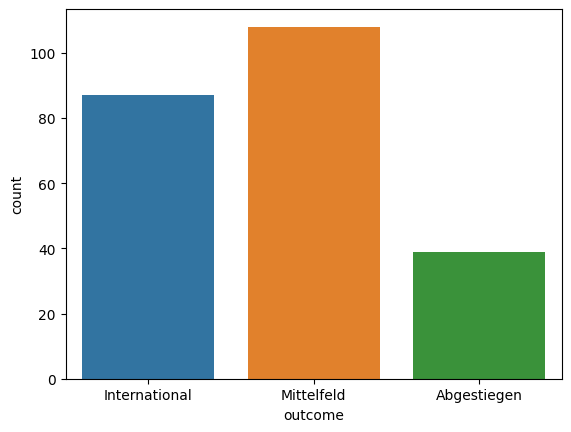

In [ ]:
sns.countplot(x='outcome', data=df)

As we can see, we are dealing with an imbalanced data set. We have different options for how to deal with that. We will use the F1 macro score to determine the efficiency of our model(s).

Let's continue with the exploratory analysis.

In [ ]:
df[df['Rg']==1][['season', 'Verein']]

,season,Verein
0,2023,Bayern Munich
18,2022,Bayern Munich
36,2021,Bayern Munich
54,2020,Bayern Munich
72,2019,Bayern Munich
90,2018,Bayern Munich
108,2017,Bayern Munich
126,2016,Bayern Munich
144,2015,Bayern Munich
162,2014,Bayern Munich


Number of Championsships:  Bayern Munich    11
Dortmund          2
Name: Verein, dtype: int64


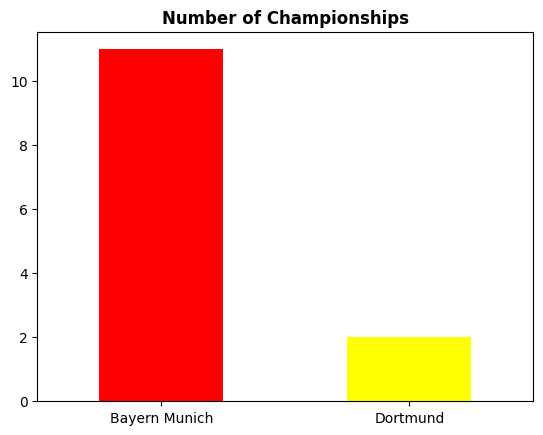

In [ ]:
# the most titles won by a club in the dataset in the last 13 years
df[df['Rg']==1]['Verein'].value_counts().plot(kind='bar', color=['red', 'yellow'])
plt.xticks(rotation=0)
plt.title('Number of Championships', fontweight='bold', size=12)
print('Number of Championsships: ', df[df['Rg']==1]['Verein'].value_counts())

<Axes: xlabel='season'>

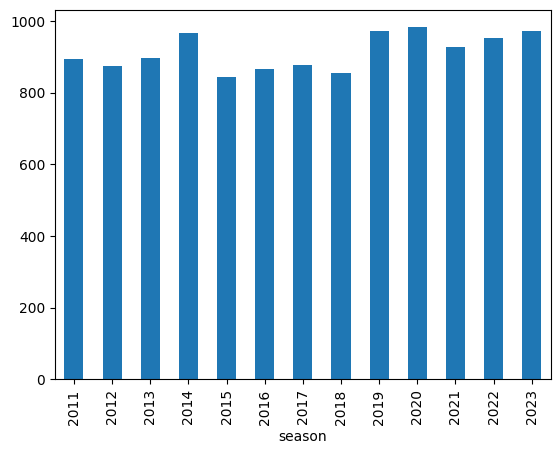

In [ ]:
# how the total goals have developed over the seasons
df.groupby('season')['Tf'].sum().plot(kind='bar')

The goal output was stable over the last 13 years. Only from 2015 to 2018 was a slight decrease in goals.

<Axes: xlabel='outcome', ylabel='Pkt'>

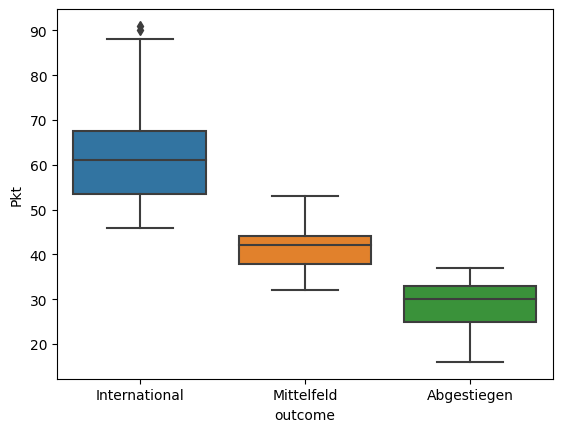

In [ ]:
# difference in point distirubtion between the outcomes of the season
sns.boxplot(x='outcome', y='Pkt', data=df)

Here we can observe something interesting; let us zoom in on this particular area I'm referring to.

(25.0, 60.0)

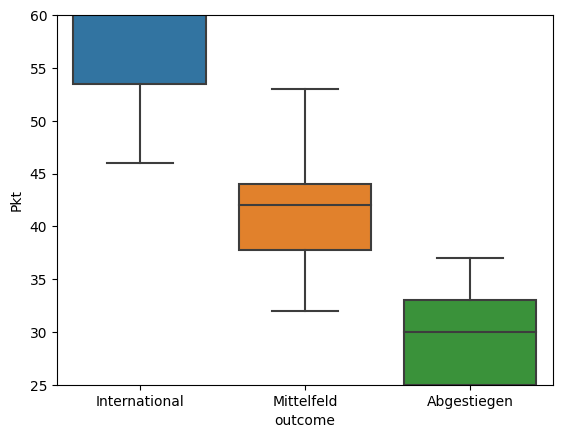

In [ ]:
sns.boxplot(x='outcome', y='Pkt', data=df)
plt.ylim(25,60)

Here we can see that the different season outcomes start to overlap, which will be challenging for our model(s). Precisely this aspect justifies us in building the model because the lines between the different outcomes can get blurry.

Let's check how points developed over the different seasons.

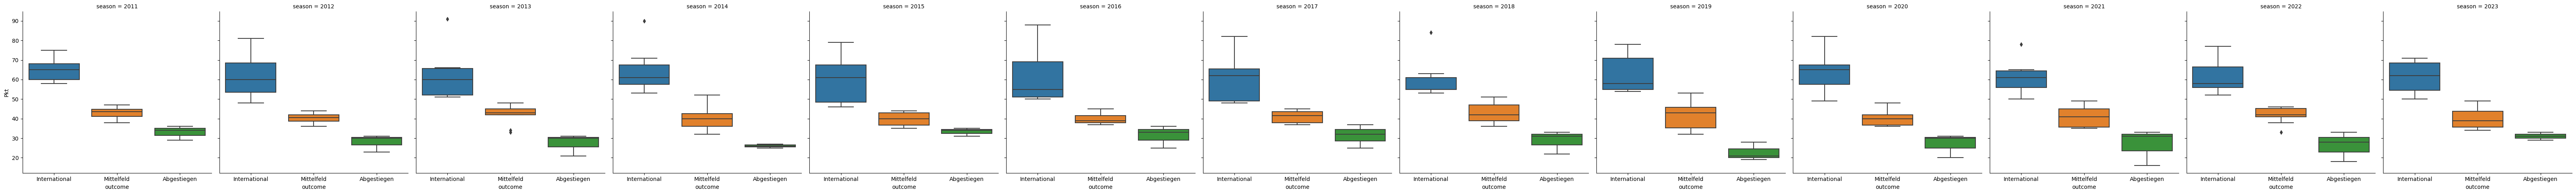

In [ ]:
sns.catplot(x='outcome', y='Pkt', kind='box', col='season', data=df)

When we view the data for each season separately, we can see that they do not overlap much.

<Axes: xlabel='outcome', ylabel='lose_pct'>

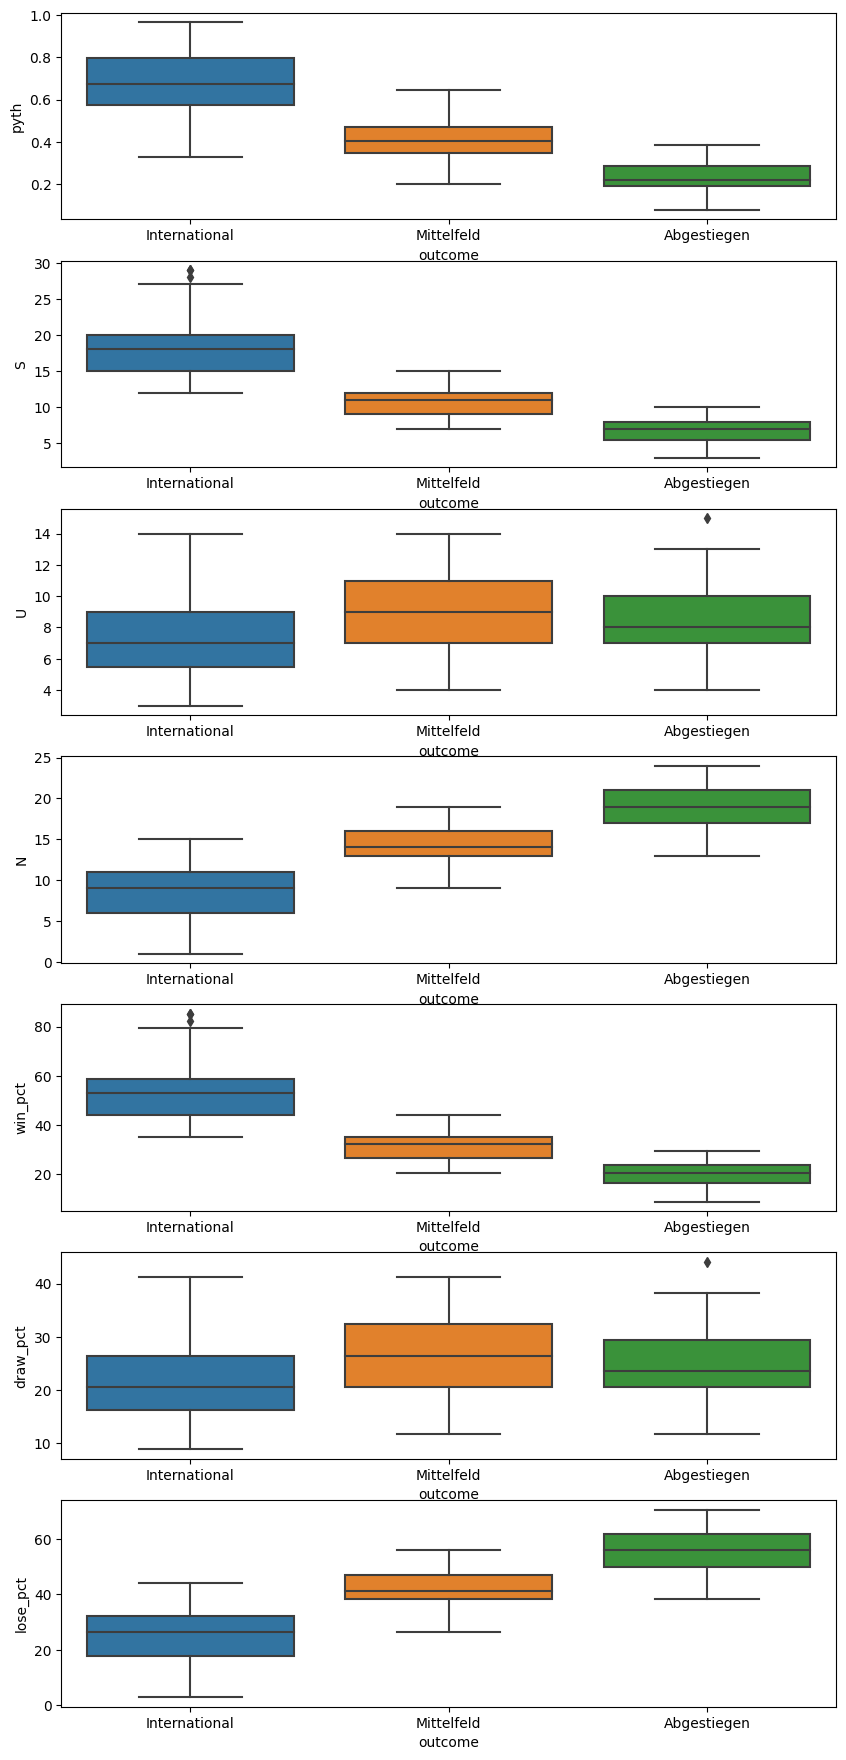

In [ ]:
plt.figure(figsize=(10,22))
plt.subplot(7,1,1)
sns.boxplot(x='outcome', y='pyth', data=df)
plt.subplot(7,1,2)
sns.boxplot(x='outcome', y='S', data=df)
plt.subplot(7,1,3)
sns.boxplot(x='outcome', y='U', data=df)
plt.subplot(7,1,4)
sns.boxplot(x='outcome', y='N', data=df)
plt.subplot(7,1,5)
sns.boxplot(x='outcome', y='win_pct', data=df)
plt.subplot(7,1,6)
sns.boxplot(x='outcome', y='draw_pct', data=df)
plt.subplot(7,1,7)
sns.boxplot(x='outcome', y='lose_pct', data=df)

We can observe the same in pyth, victories, draws, losses, win_pct, draw_pct and lose_pct.

Another interesting aspect is that the season outcomes are on a relatively same level regarding draws and draws_pct, but you can see that the midfielders (Mittelfeld) are **slightly** ahead. This observation indicates that midfielder teams tend to have more often draws than teams that qualify for international competitions or get demoted. This can be another challenge for our models.

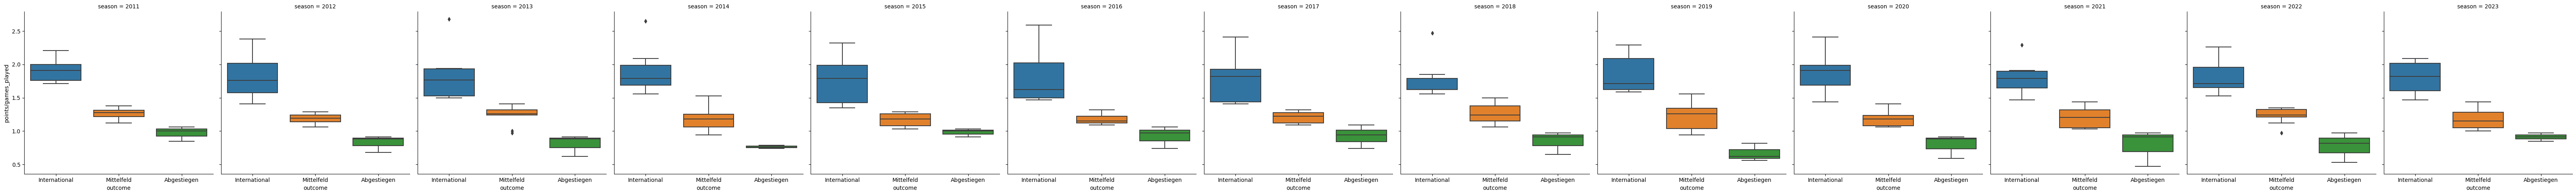

In [ ]:
# average points/games_played by outcome
sns.catplot(x='outcome', y='points/games_played', kind='box', col='season', data=df)

## What are the most important features in predicting the season outcome correcetly?

To determine which features are the most important for our project, we will use an ExtraTreesClassifier.
This approach gives us more insight, espically when we do not have just continous data.

In [ ]:
df.columns

Index(['Rg', 'Verein', 'GS', 'S', 'U', 'N', 'Tf', 'Tk', 'TD', 'Pkt', 'xG',
       'xGA', 'xGD', 'xGD/90', 'outcome', 'season', 'top_scorer(s)',
       'top_scorer_goals', 'points/games_played', 'win_pct', 'draw_pct',
       'lose_pct', 'pyth', 'y_output'],
      dtype='object')

In [ ]:
# we dropped Rg=Rank because we want to predict the outcome of the season
# and we want to use the model before the season is ended (that is why we exclude top_scorer(s) as well)
# here we include clubs, by transforming them into dummy variables
X=pd.get_dummies(df.drop(['outcome', 'y_output', 'top_scorer(s)', 'Rg'], axis=1), drop_first=True)
y=df['y_output']

In [ ]:
# so we can see how many columns we have
df.shape

(234, 24)

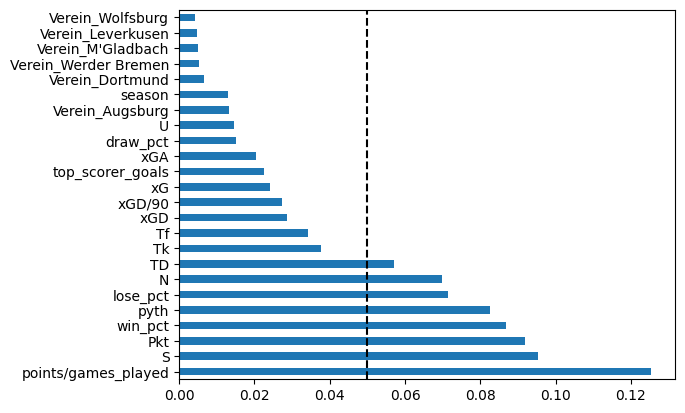

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_feat=ExtraTreesClassifier(random_state=101)
extra_feat.fit(X,y)
feat_import=pd.Series(extra_feat.feature_importances_, index=X.columns)
# here we want to see the the importance of
feat_import.nlargest(24).plot(kind='barh')
plt.axvline(0.05,c='black', ls='--')

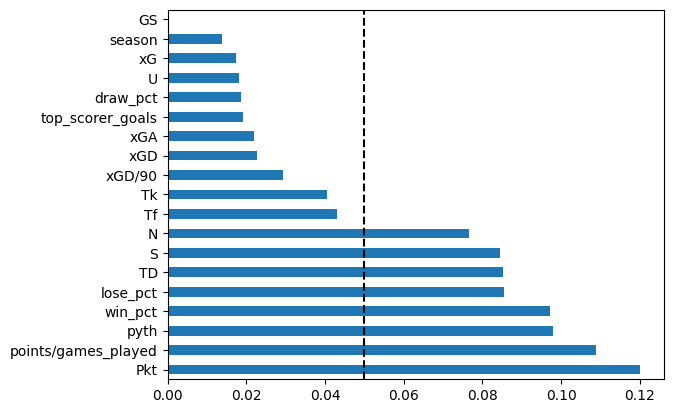

In [ ]:
# In this attempt, we drop clubs as well, leaving the club in the model might lead to data leakage
X=df.drop(['outcome', 'y_output', 'top_scorer(s)', 'Verein', 'Rg'], axis=1)
y=df['y_output']

extra_feat=ExtraTreesClassifier(random_state=101)
extra_feat.fit(X,y)
feat_import=pd.Series(extra_feat.feature_importances_, index=X.columns)
feat_import.nlargest(24).plot(kind='barh')
plt.axvline(0.05,c='black', ls='--')

When we look at the outcome of the feature importance analysis, we can see which features are important for our classification model. I have set the threshold at 0.05 (see the black vertical line).

Everything below 0.05 will not be selected for our model. In future studies, more or less features can be chosen.

Next, we will use other methods to confirm our decision.

## HeatMap

<ipython-input-32-834d942b33ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['Rg', 'GS'], axis=1).corr(), annot=True)


<Axes: >

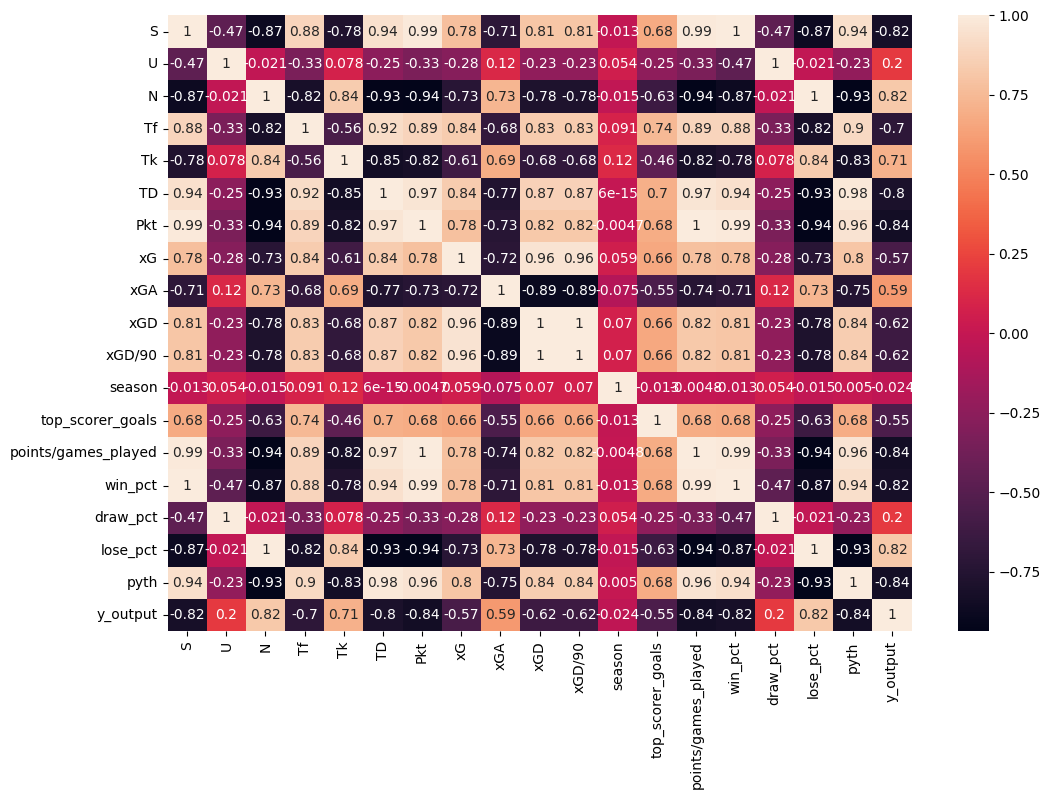

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Rg', 'GS'], axis=1).corr(), annot=True)

The heatmap does not provide the insight that I was hoping for. To better understand how the dependent variable/the y feature behaves with the x features, we will get the correlation levels between the x and y feature(s).

<ipython-input-33-8a5da492054e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(['Rg', 'GS'], axis=1).corr().loc['y_output',:][:-1].plot(kind='bar',color=['green', 'black'])


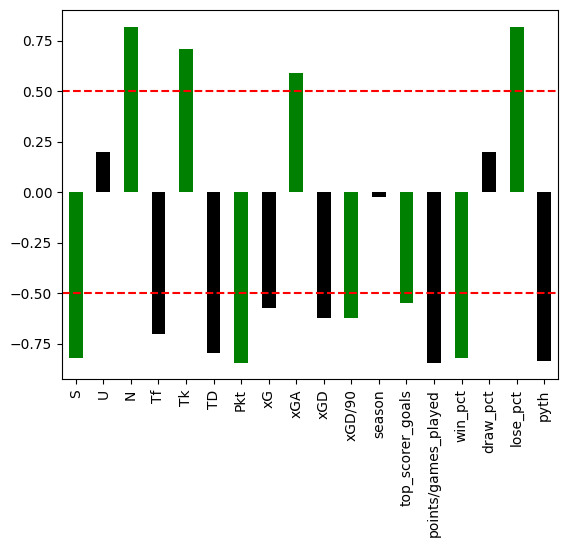

In [ ]:
df.drop(['Rg', 'GS'], axis=1).corr().loc['y_output',:][:-1].plot(kind='bar',color=['green', 'black'])
plt.axhline(-0.5, color='red', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--')

We have more or less the same outcome as we had in the importance analysis. Let's get an idea of how the data behaves in distribution.

In [ ]:
sns.pairplot(df, hue='outcome', corner=True, palette='icefire')

Output hidden; open in https://colab.research.google.com to view.

Here we can see how the data behaves, but most important for us, we can also see the distribution of the numerical values.

Here we can see that the numerical features follow more or less a normal distribution. This is important to know for the models which need scaling. In this case, because we deal with a normal distribution, we can use the StandardScaler.

After evaluating all our methods regarding the feature selection, we will us following X features:

- Pkt

- points/games_played

- win_pct

- pyth

- lose_pct

- S

- TD

- N

- Tf

- Tk

## Model Selection

After getting an idea how the data behaves and which features are important, we need to decide which models should be used.

We will try follwoing models:
- Logistic Regression => Multipel Logistic Regression

- Support Vector Classifier

- RandomForest Classifier

- XGBoost Classifier

## F1-Score
We will use the F1 score as an evaluation metric for this project. This is because the metric is very common for classification problems, giving us great insight into how well the model predicts "True Positives". We want to predict the season outcome of a team correctly, so we want to know how good the model is in predicting the correct outcome rather than how often it did not predict the right outcome. Because we have a multiclass problem and the data is imbalanced, but we value/weigh each class the same, we will use the macro F1-score, which allows us to weigh each class the same.

# Basline Model

Before we train our models, we need to understand what our models need to beat. Therefore we create a baseline model to give us a starting point.

In [ ]:
from sklearn.dummy import DummyClassifier

# these are the X features that we will use for every model (scaling will be done later on for those models which need scaled X features)
X=df[['Pkt', 'points/games_played', 'win_pct', 'lose_pct', 'pyth', 'S', 'N', 'TD', 'Tf', 'Tk']]

# this is the y feature that we will use for every model
y=df['y_output']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

clf_dummy=DummyClassifier(random_state=101)
clf_dummy.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

# StratifiedKFold is commonly used for classification problems
cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

scorer=make_scorer(f1_score, average='macro')

scores=cross_val_score(clf_dummy, X_train, y_train, cv=cv, scoring=scorer)
print('F1-score basline score: ',scores.mean())

F1-score basline score:  0.2166666666666667


The baseline model could perform better, it will be easy to beat the baseline model. It is essential to remind ourselves why we create a baseline model. We create baseline models to understand what our model(s) need to beat. As mentioned, the baseline model performs poorly, but this can indicate that we have a difficult task at hand, and we might not be able to perform even better.

But we should try our different models, but it is essential to mention that we might need to improve more.

Next, we will train a KNN model.

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# these are the X features that we will use for every model (scaling will be done later on, for those models which need scaled X fatures)
X=df[['Pkt', 'points/games_played', 'win_pct', 'lose_pct', 'pyth', 'S', 'N', 'TD', 'Tf', 'Tk']]

# this is the y feature that we will use for every model
y=df['y_output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

scaler=StandardScaler()
# scaled X features
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

multi_knn=KNeighborsClassifier()

param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform', 'distance', None], 'algorithm':['auto','kd_tree','brute'],
            'leaf_size':[5,10,20,30,40,50,60,80,100,500,1000], 'p':[1,2], 'metric':['euclidean','manhattan','chebyshev','minkowski']}

multi_knn=RandomizedSearchCV(multi_knn, param_distributions=param_grid, n_iter=500, scoring=scorer, random_state=101,
                            cv=cv, error_score='raise', return_train_score=True)

In [ ]:
multi_knn.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=KNeighborsClassifier(),
                   n_iter=500,
                   param_distributions={'algorithm': ['auto', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [5, 10, 20, 30, 40, 50, 60,
                                                      80, 100, 500, 1000],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance',
                                                    None]},
                   random_state=101, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro))

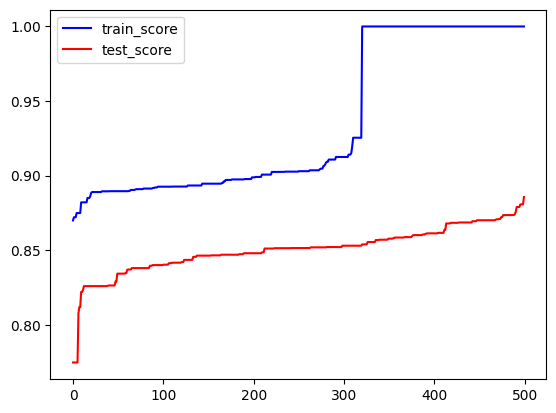

In [ ]:
multi_knn.cv_results_.keys()
train_score=sorted(multi_knn.cv_results_['mean_train_score'])
test_score=sorted(multi_knn.cv_results_['mean_test_score'])

plt.figure()
plt.plot(train_score, color='blue')
plt.plot(test_score, color='red')
plt.legend(['train_score', 'test_score'])

In [ ]:
print(multi_knn.best_params_)
knn_f1=multi_knn.best_score_
print('Best F1-Score performance of on imbalanced data: ', knn_f1)

{'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'metric': 'chebyshev', 'leaf_size': 40, 'algorithm': 'kd_tree'}
Best F1-Score performance of on imbalanced data:  0.8856615268689572


We can see that the KNN model immediately performs better than the baseline model.

But it is essential to mention that our model overfits, as we can see in the drastic increase of the train score.

Next, we will create a Support Vector Classifier.

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc_multi=SVC(random_state=101)

param_grid_svc={'C':[0.001,0.01,0.1,0.9,1,2,5,10,100,1000], 'kernel':['linear','poly','rbf','sigmoid'], 'degree':[1,2,3,4,5], 'gamma':[0.0001,0.001,0.01,0.1,1,2,5,10],
                'tol':[0.001,0.01,0.1,1], 'decision_function_shape':['ovo','ovr'], 'break_ties':[True, False]}

cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

svc_multi=RandomizedSearchCV(svc_multi, param_distributions=param_grid_svc, cv=cv, n_iter=500, scoring=scorer, random_state=101, return_train_score=True)

In [ ]:
svc_multi.fit(scaled_X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=SVC(random_state=101), n_iter=500,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.9, 1, 2, 5,
                                              10, 100, 1000],
                                        'break_ties': [True, False],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  2, 5, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'tol': [0.001, 0.01, 0.1, 1]},
                   random_state=101, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro))

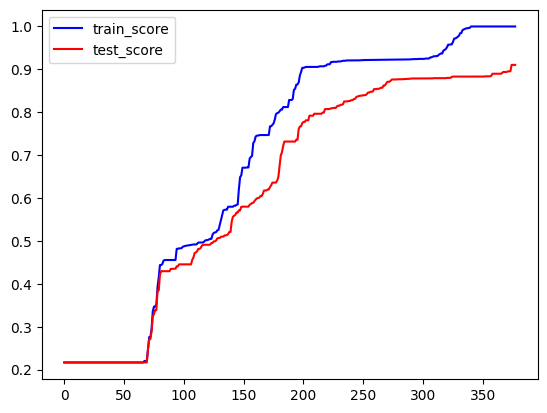

In [ ]:
svc_multi.cv_results_.keys()

train=np.array(svc_multi.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(svc_multi.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted(train2), color='blue')
plt.plot(sorted(test2), color='red')
plt.legend(['train_score', 'test_score'])

In [ ]:
print(svc_multi.best_params_)
svc_f1=svc_multi.best_score_
print('Best F1-Score performance of the Support Vector Classifier: ', svc_f1)

{'tol': 1, 'kernel': 'linear', 'gamma': 0.0001, 'degree': 3, 'decision_function_shape': 'ovr', 'break_ties': False, 'C': 0.9}
Best F1-Score performance of the Support Vector Classifier:  0.9104741004895803


The support vector machine is our best-performing model currently, and on top, it is not overfitting or underfitting.

Next, we will move to the tree-based models.
Models that we will perform:
- Decision Treem
- RandomForest
- XGBoost Classifier

## Decision Tree

In [ ]:
# here a quick reminder on how many features our model runs, this can be helpfull when it comes to the hyperparameter tunining
print('Number of X features in our model: ', X.shape[1])

Number of X features in our model:  10


In [ ]:
# this gives us an idea of how big the disbalance in the data is

print('Ratio of International Qualifier: ',df[df['y_output']==0]['y_output'].count()/len(df))

print('Ratio of Midfielders: ',df[df['y_output']==1]['y_output'].count()/len(df))

print('Ratio of demoted teams: ',df[df['y_output']==2]['y_output'].count()/len(df))

Ratio of International Qualifier:  0.3717948717948718
Ratio of Midfielders:  0.46153846153846156
Ratio of demoted teams:  0.16666666666666666


In [ ]:
from sklearn.tree import DecisionTreeClassifier

multi_class_tree=DecisionTreeClassifier(random_state=101)

dec_tree_params={'criterion':['gini','entropy','log_loss'], 'splitter':['best','random'], 'max_depth':[1,2,3,4,5,10,15,20,30,40,50,100], 'min_samples_split':[1,2,3,4,5,10,20,50,100],
                 'min_samples_leaf':[1,2,3,4,5,10,20,50,100], 'min_weight_fraction_leaf':np.linspace(0.1,0.5,20), 'max_features':['auto','sqrt','log2'],
                 'class_weight':[{1:1},{1:2},{1:3},{1:4},{1:5},{1:6},{2:1},{3:2},{3:1},{3:4},{4:1},{4:6}]}

cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

multi_class_tree=RandomizedSearchCV(multi_class_tree, param_distributions=dec_tree_params, cv=cv, n_iter=500, scoring=scorer, random_state=101, return_train_score=True)

In [ ]:
multi_class_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=101),
                   n_iter=500,
                   param_distributions={'class_weight': [{1: 1}, {1: 2}, {1: 3},
                                                         {1: 4}, {1: 5}, {1: 6},
                                                         {2: 1}, {3: 2}, {3: 1},
                                                         {3: 4}, {4: 1},
                                                         {4: 6}],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 10, 15, 20,
                                                      30, 40, 50, 100],
                                        'max_feat...
                                        'min_weight_fraction_leaf': array([0.1       , 0.12105263, 0.14210526, 0.16315789, 0.18421053,
       0.20526316, 0.22631579, 0.24736842, 0.26842105, 0.28947368,
       0.31052632, 0.33157895, 0.35263158, 0.37368421, 0.39473684,
       0.41578947, 0.43684211, 0.45789474, 0.47894737, 0.5       ]),
                                        'splitter': ['best', 'random']},
                   random_state=101, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro))

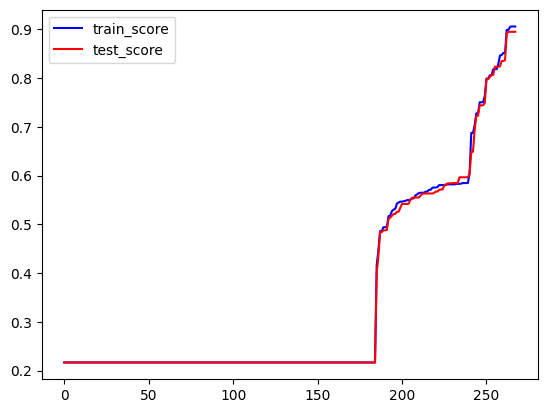

In [ ]:
multi_class_tree.cv_results_.keys()

train=np.array(multi_class_tree.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(multi_class_tree.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted(train2), color='blue')
plt.plot(sorted(test2), color='red')
plt.legend(['train_score', 'test_score'])

In [ ]:
print(multi_class_tree.best_params_)
dectree_f1=multi_class_tree.best_score_
print('Best F1-Score performance of the Decision Tree Classifier: ', dectree_f1)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.14210526315789473, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy', 'class_weight': {1: 1}}
Best F1-Score performance of the Decision Tree Classifier:  0.8952050864512164


The Decision Tree cannot outperform the Support Vector Machine and is also underfitting. Our model is not able to understand the unique characteristics of the data, and therefore, the train and test scores do not separate.

Next, we will create RandomForest Classifier and check how the model will perform on the data.

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mulit_class_RF=RandomForestClassifier(random_state=101)

param_grid_RF={'n_estimators':[5,10,100,200,250,500], 'criterion':['gini','entropy','log_loss'], 'max_depth':[1,2,3,4,5,10,15,20,30,40,50,100],
               'min_samples_split':[1,2,3,4,5,10,20,50,100], 'min_samples_leaf':[1,2,3,4,5,10,20,50,100], 'min_weight_fraction_leaf':np.linspace(0.1,0.5,20),
               'min_impurity_decrease':np.linspace(0.1,5.0,20), 'bootstrap':[True, False], 'oob_score':[True, False],
               'class_weight':[{1:1},{1:2},{1:3},{1:4},{1:5},{1:6},{2:1},{3:2},{3:1},{3:4},{4:1},{4:6}]}

mulit_class_RF=RandomizedSearchCV(mulit_class_RF, param_distributions=param_grid_RF, cv=cv, n_iter=500, scoring=scorer, random_state=101, return_train_score=True)

In [ ]:
mulit_class_RF.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=RandomForestClassifier(random_state=101),
                   n_iter=500,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{1: 1}, {1: 2}, {1: 3},
                                                         {1: 4}, {1: 5}, {1: 6},
                                                         {2: 1}, {3: 2}, {3: 1},
                                                         {3: 4}, {4: 1},
                                                         {4: 6}],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 10, 15, 2...
                                        'min_weight_fraction_leaf': array([0.1       , 0.12105263, 0.14210526, 0.16315789, 0.18421053,
       0.20526316, 0.22631579, 0.24736842, 0.26842105, 0.28947368,
       0.31052632, 0.33157895, 0.35263158, 0.37368421, 0.39473684,
       0.41578947, 0.43684211, 0.45789474, 0.47894737, 0.5       ]),
                                        'n_estimators': [5, 10, 100, 200, 250,
                                                         500],
                                        'oob_score': [True, False]},
                   random_state=101, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro))

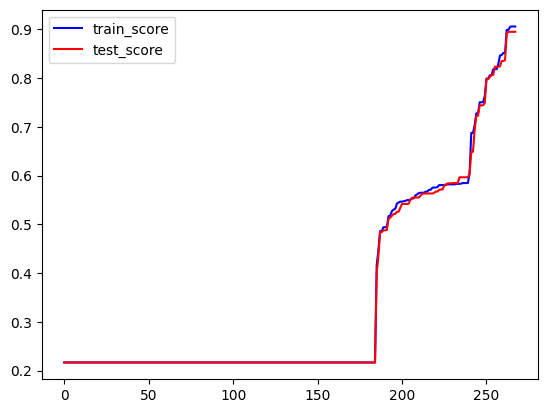

In [ ]:
multi_class_tree.cv_results_.keys()

train=np.array(multi_class_tree.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(multi_class_tree.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted(train2), color='blue')
plt.plot(sorted(test2), color='red')
plt.legend(['train_score', 'test_score'])

In [ ]:
print('Best Params for the RandomForestClassifier: ',mulit_class_RF.best_params_)
randfor_f1=mulit_class_RF.best_score_
print('Best F1-Score performance of the RandomForest Classifier: ', randfor_f1)

Best Params for the RandomForestClassifier:  {'oob_score': False, 'n_estimators': 5, 'min_weight_fraction_leaf': 0.1842105263157895, 'min_samples_split': 20, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.1, 'max_depth': 100, 'criterion': 'gini', 'class_weight': {2: 1}, 'bootstrap': True}
Best F1-Score performance of the RandomForest Classifier:  0.8598538996836209


The RandomForest cannot outperform the Support Vector Machine and is also underfitting.

## XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_multi_class=xgb.XGBRFClassifier(objective='multi:softmax')

param_grid_xgb={'learning_rate':[0.01,0.1,0.15,0.2], 'gamma':np.linspace(0,0.5,10), 'reg_alpha':np.linspace(0,3,10),
               'reg_lambda':np.linspace(0,3,10), 'max_depth':[1,2,3,4,5,6,7,8,9,10,50,100,200],
                'subsample':np.linspace(0.5,0.9,10), 'colsample_bytree':np.linspace(0.5,0.9,10),
                'lambda':[0,0.001,0.01,0.1,0.2,0.5,0.75,0.9,0.99,1], 'alpha':[0,0.001,0.01,0.1,0.2,0.5,0.75,0.9,0.99,1],
               'scale_pos_weight':[0,1,2,3,4]}

xgb_multi_class=RandomizedSearchCV(xgb_multi_class, param_distributions=param_grid_xgb, cv=cv,
                                   n_iter=500, scoring=scorer, error_score='raise', random_state=101, return_train_score=True)

In [ ]:
xgb_multi_class.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:35:28] WARNING: ../src/learner.cc:767: 
Parameter

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise',
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             import...
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ]),
                                        'reg_lambda': array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ]),
                                        'scale_pos_weight': [0, 1, 2, 3, 4],
                                        'subsample': array([0.5       , 0.54444444, 0.58888889, 0.63333333, 0.67777778,
       0.72222222, 0.76666667, 0.81111111, 0.85555556, 0.9       ])},
                   random_state=101, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro))

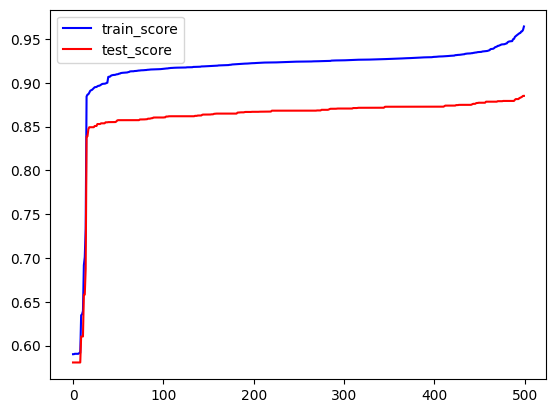

In [ ]:
xgb_multi_class.cv_results_.keys()

train=np.array(xgb_multi_class.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(xgb_multi_class.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted(train2), color='blue')
plt.plot(sorted(test2), color='red')
plt.legend(['train_score', 'test_score'])

In [ ]:
print(xgb_multi_class.best_params_)
xgb_f1=xgb_multi_class.best_score_
print('Best F1-Score of the XGBoost Classifier: ', xgb_f1)

{'subsample': 0.5, 'scale_pos_weight': 1, 'reg_lambda': 0.0, 'reg_alpha': 2.6666666666666665, 'max_depth': 7, 'learning_rate': 0.01, 'lambda': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8111111111111111, 'alpha': 0.99}
Best F1-Score of the XGBoost Classifier:  0.8850522422194249


The XGBoost model is not beating the Support Vector Machine regarding pure performance. Still, it has a nice separation between train and test scores, indicating that the model is not over- or underfitting.

Next, we create a data frame to better overview the f1-score. We will use the f1-score because it allows us to evaluate the performance of models with imbalanced data (weighted) and balanced data (macro).

In [ ]:
data={'knn':knn_f1, 'svc':svc_f1, 'DecisionTree':dectree_f1, 'RandomForest':randfor_f1,
      'XGBoost':xgb_f1}
f1_score_output=pd.DataFrame.from_dict(data, orient='index').rename(columns={0:'best f1_score'})
f1_score_output

,best f1_score
knn,0.885662
svc,0.910474
DecisionTree,0.895205
RandomForest,0.859854
XGBoost,0.885052


In [ ]:
f1_score_output[f1_score_output['best f1_score']==f1_score_output['best f1_score'].max()]

,best f1_score
svc,0.910474


Our best-performing model is the Support Vector Classifier. Let's finalize the model.

# Final Model

In [ ]:
svc_multi.best_params_

{'tol': 1,
 'kernel': 'linear',
 'gamma': 0.0001,
 'degree': 3,
 'decision_function_shape': 'ovr',
 'break_ties': False,
 'C': 0.9}

0.8892020985044241
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.93      0.78      0.85        18
           2       0.80      1.00      0.89         8

    accuracy                           0.89        47
   macro avg       0.88      0.91      0.89        47
weighted avg       0.90      0.89      0.89        47



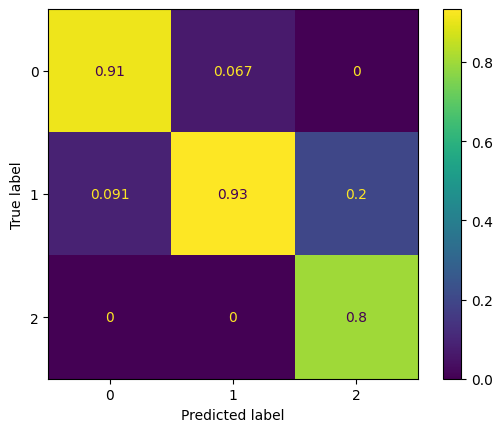

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
final_model=SVC(C=0.9, tol=1, kernel='linear', gamma=0.0001, degree=3, decision_function_shape='ovr', break_ties=False,
               random_state=101)
final_model.fit(scaled_X_train, y_train)
y_pred=final_model.predict(scaled_X_test)
print(f1_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred, labels=final_model.classes_, normalize='pred')
dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
dis.plot()

In [ ]:
import joblib
joblib.dump(final_model, 'bundesliga_prediction.pkl')

['bundesliga_prediction.pkl']

In [ ]:
# these are the columns which we need to predict outcomes
list(X.columns)

['Pkt',
 'points/games_played',
 'win_pct',
 'lose_pct',
 'pyth',
 'S',
 'N',
 'TD',
 'Tf',
 'Tk']

In [ ]:
def out_put(x):
    if x==0:
        return 'International'
    elif x==1:
        return 'Mittelfeld/Midfield'
    else:
        return 'Abgestiegen/Demoted'

In [ ]:
def pyth_calculator(x,y):
     return round((x**2)/((x**2)+(y**2)),2)

In [ ]:
# pyth calculator
pyth_calculator(int(input('Goals scored: ')), int(input('Goals received: ')))

Goals scored: 34
Goals received: 63


0.23

In [ ]:
# To proof the performance we have taken the Herat performance of the 2022/2023 season, which led to a demotion
inputs=(input('How many points will the team have?: '),input('How many points did the team score on average?: ')
        ,input('What is the win percentage of the team?: '),input('What was the loss percentage of the team?: ')
        ,input('What was the pythogrian value?=> see the calculator above: '),input('How many matches did the team win?: ')
        ,input('How many matches did the team lose?: '),input('What is the goal differene of the team?: '),
        input('How many goals did the team score?: '),input('How many goals were scored against the team?: '))
scale_input=[list(inputs)]
trans_input=scaler.transform(scale_input)
pred=final_model.predict(trans_input)

print('Season Outcome: ',out_put(pred))

How many points will the team have?: 21
How many points did the team score on average?: 0.62
What is the win percentage of the team?: 0.12
What was the loss percentage of the team?: 0.62
What was the pythogrian value?=> see the calculator above: 0.23
How many matches did the team win?: 4
How many matches did the team lose?: 21
What is the goal differene of the team?: -34
How many goals did the team score?: 26
How many goals were scored against the team?: 60
Season Outcome:  Abgestiegen/Demoted


/Users/alexandergandji/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
